**声明：**

hello，小伙伴们~

感谢大家对小鲸鱼的大力支持，目前我在搜集大量经典书籍和资料，其中涉及：

1. **🔥数学统计：**打好理论基础！
2. 🔥**数据分析：**包括数据分析、商业数据分析等
3. 🔥**数据科学：**数据建模、机器学习、AI框架等
4. 🔥**Python/R cookbook**

还有关于数据结构、算法、数据库等等

以及面经、更多的视频资料整理！

总之，这个仓库会一直更新，分享不会停止！

不收费，但只分享给有需要的人，曾经没人帮我指路，但我不希望大家走太多弯路！

**公众号：鲸析**

![](https://tuchuangs.com/imgs/2022/02/e213757d6a0c0007.jpg)

---

能够跟大家开启一个Kaggle项目，🐋满怀期待，希望我们能够通力合作，碰撞出火花！

废话不多说了，首先对整个项目做一个概述，梳理一下分析流程：

**商业意义** 

第一步，本项目的商业意义&目的。

很明确，目的是预测驾驶员明年提出保险索赔的概率以此控制保险成本。

原因是老司机不会为高额的保险费而买单，毕竟他们的事故率很低，那么公司通过预测驾驶员明年提出索赔要求的概率来定价。

**问题转化**

那么结合数据来看，本项目的数据集分为训练集和测试集，训练集共有`595212`行、`59`列，测试集共有`892816`行、`58`列。

> 训练集多出的一列是Target，也就是我们所谓的label，表示该用户是否提出索赔（0 or 1）。
>
> 而测试集中没有label，我们需要通过测试集的数据预测其明年的索赔概率，所以并没有用传统的 scoring metric 来进行衡量（confusion matrix等）

所以我们要对数据进行处理、分析、特征工程，再将处理好的数据代入机器学习模型，最终输出的是概率。

值得注意的是，项目所给的特征没有标明明确的含义（可能出于对客户的保护），但是给出了对应的变量类型（所以搞清楚变量类型多重要！）

- binary ==> 0 or 1
- nominal ==> categorical 不含顺序
- ordinal ==> categorical 含顺序
- interval ==> continuous 无绝对零点

**项目角色**

这里不展开，根据个人情况明确项目角色，在这里你就是一个全栈机器学习工程师哈哈哈！

**数据分析**

这里我给出几个tips，顺着这个思路去思考可能会有帮助！

1. 数据清洗：缺失值？重复值？异常值？
2. 变量类型处理：如何encoding？不同类型变量如何处理？
3. 数据可视化：特征分布情况？相关性？
4. 特征工程：特征选取？特征增强？特征合并？特征归一化？

**数据建模**

注意到，我们所处理的是tabular data，也就是表格数据（行列），所以对于这一类数据最好用树模型，比如LightGBM、XGBoost等，不过可以用LR作benchmark。


再给几个tips:
1. 如何计算Normalized Gini Coefficient？
2. 如何避免过拟合？（kfold/early stopping）
3. 如何调参？（max_depth/learning_rate/min_child_weight）



**测试部署**

这里主要就是模型的版本迭代、测试并对版本更替进行记录，一般会迭代优化10至20次左右，然后生成submit.csv，并且建议用notebook整合前面所有步骤，并加以文字注解，合并成一份完整文档，并在细节处进行调整。

---

<img src="https://s4.ax1x.com/2022/02/11/HaDitA.png" alt="HaDitA.png" style="zoom:50%;" />

## 项目介绍

为了照顾到每位同学的实际情况，我准备把项目劈成2块，上半部分集中于<font color='red'>数据分析</font>，下半部分集中于<font color='red'>数据科学</font>，从而方便各阶段同学更有效地吸收知识，就地取材，在自己的简历上添砖加瓦！

本笔记（上半部分）旨在深入了解 PorteSeguro 比赛的数据。此外，还提供了一些小tips和tricks来准备数据以备后续的数据建模过程。

---


该notebook由以下主要部分组成：



1. [项目提案&数据梳理](#project_proposal)
    - 1.1 [项目流程梳理](#progress)
    - 1.2 [项目提案](#proposal)
    - 1.3 [数据梳理](#integration)
    
---
2. [数据分析（一）元数据管理&基本数据分析](#data_preprocessing)
    - 2.1 [变量类型](#dtype)
    - 2.2 [元数据](#metadata)
    - 2.3 [元数据描述性分析](#metadata_descriptive)
    
---    
3. [数据分析（二）探索性分析](#eda)
4. [数据分析（三）特征工程](#feat_engineering)
5. [数据分析（四）特征选择](#feat_selection)
6. [数据建模](#model)


<div class="alert alert-block alert-warning">
<center><b>项目日志（2022年2月14日）</b></center>
    
2022年2月14日情人节，小鲸鱼正式发起第一个kaggle project的挑战，正式开启第一阶段：【项目提案&数据梳理】


    
**第一节阶段核心目的：**分析研究项目的核心价值、需求逻辑，建立数据分析框架，并完成项目提案（proposal），以及初步的数据梳理
    
**难度（最高5星）：**⭐⭐
    
**第一阶段周期：** 2022年2月14日 至 2022年2月20日（北京时间）
    
    
**分值**：满分6分，附加题答对8分

Good Luck!
</div>


<h2 id="project_proposal">项目提案&数据梳理</h2>

<div class="alert alert-block alert-info">这一次，需要各组长带领各组员分配此次项目的任务以及确定项目角色，并且着重讨论本项目的商业目的。</div>

<div class="alert alert-block alert-success"><b>Step 1 (2分)</b>: 描述本项目的数据来源，保险公司为什么会发起这次挑战，期待我们解决什么问题？</div>

In [1]:
# 答案写在下方空白的markdown块里。后面不重复说明

<div class="alert alert-block alert-success"><b>Step 2 (2分)</b>: 根据项目要求，简要叙述关于本项目，你们组希望从哪些方面解决问题（所解决的问题继承上一题的答案）</div>

<div class="alert alert-block alert-success"><b>Step 3 (1分)</b>: 在接触实际数据之前，我们对项目有了初步的认识，那么我们来看看实际的数据吧！请使用pandas的read_csv函数导入项目数据（train和test）</div>

In [2]:
# 代码写在下面

import pandas as pd



<div class="alert alert-block alert-info"> 
<p style="font-size:20px; display:inline">💡</p> 小贴士：

pd.read_csv的参数使用：<br> 
    <font color = #0abfab>在notebook中，点击函数，按住【Shift+Tab】，可以查看函数使用方法</font><br>
<center><font color = #fc5430 size = 3>header</font></center> 
默认值为0，意为将文件第0行数据作为列名；<br>
若header=None，则自动生成0，1，2，...为列名，文件从第0行就读取为数据；<br>
若header=1，则第0行被舍弃，第1行读取为列名；<br>
<center><font color = #fc5430 size = 3>index_col</font></center> 
    默认是None，若表中没有索引，不需设置，如果自带索引（第0列），那么需要设置 index_col = 0
<center><font color = #fc5430 size = 3>skiprows</font></center> 
    跳过某些行，例如 skiprows=lambda x: x % 2 != 0
<center><font color = #fc5430 size = 3>nrows</font></center>
    nrows=20 则读取20行，从第0行开始读
</div>

<div class="alert alert-block alert-success"><b>Step 4 (1分)</b>: 尝试用 info(), head(), tail() 函数检查训练数据和测试数据</div>

以下是比赛数据的基本描述：

由于对于客户安全性的考虑，特征名称没用明确给出。

* 属于**相似分类的特征在特征名称中被标记为**（例如，ind、reg、car、calc）。
* 特征名称包括表示二元特征的后缀 **bin**（0 or 1） 和表示分类特征的 **cat**。
* 特征**没有这些名称是连续的或有序的**。
* **-1** 的值表示该特征在观察中**缺失**。
* **target** 列表示是否为该保单持有人提出索赔。

让我们快速用代码查看数据的基本情况吧！

In [3]:
# TODO: info() 检查特征名字、非空值以及变量类型



# TODO: head() 查看前10行



# TODO: tail() 查看后7行



👊<font color=red>附加挑战（2分）</font>

因为我们常常要上面的方法去检查数据，有一个基本的理解，那么我们想一下子看到数据的前五行和后五行，合并在一起。


---


**请编写一个函数，名为`check_data`，输入为dataframe，输出为一个新dataframe，满足一下条件：**


1. 一共10行，列数为输入dataframe的列数
2. 前5行是输入dataframe的前五行，后5行是输入dataframe的后五行



In [4]:
# 你的答案



**补充：**

如果你有余力，建议从下面链接中完成这100道Python Pandas puzzle！来为你下一阶段保驾护航！

链接：https://github.com/ajcr/100-pandas-puzzles/blob/master/100-pandas-puzzles.ipynb

---

<img src="https://tuchuangs.com/imgs/2022/02/5ec07d2e36f8f69d.png" style="zoom:50%;" />

<div class="alert alert-block alert-warning">
<center><b>项目日志（2022年2月18日）</b></center>
   
第一期 Whale Project 参与队伍达到10组，今日正式开启第二阶段的内容编排和制作，第二阶段：【数据管理&基本数据分析】


    
**第二节阶段核心目的：**理解运用元数据整理，为不同类型的变量的数据分析打好基础；根据不同变量类型对原本数据（58个特征）进行拆解，并展开基本的数据分析
    
**难度（最高5星）：**⭐⭐⭐
    
**第二阶段周期：** 2022年2月21日 至 2022年2月27日（北京时间）
    
    
**分值**：满分14分，附加题答对16分

Good Luck!
</div>


<h2 id="data_preprocessing">数据分析（一）元数据管理&基本数据分析</h2>

第二阶段，我们正式进入【数据分析】层面，不管大家是在校生、求职党、转行党、甚至纯粹为了自我提升的伙伴们，千万不要觉得画画柱形图、饼图，找找变量之间有啥关系就是数据分析了，远不止于此。

在我们这个项目中，有58个特征，我们需要用58个特征去预测司机明年发起索赔的概率是多少，那么上一期，大家已经讨论分析过这样做的意义。

包括但不限于：

- **在司机层面：** 可以帮助司机减少不必要的保险支出，提升司机的理性投保意愿。
- **在公司层面：** 可以帮助公司对保险产品更合理的定价，帮助公司对客户在投保意愿上更准确的分析其特征，提高行业竞争力。
- **在发展层面：** 可以帮助公司缩小对客户特征的调研范围，极大节省研究成本，扩大精英特征的研究投入，对新用户索赔情况快速响应等等。

那么这一阶段，我们主要来去研究一下，什么是元数据！

- <font color=red>元数据是什么？</font>
- <font color=red>为什么在做项目时非常重要？</font>
- <font color=red>元数据管理后有什么好处？</font>
- <font color=red>元数据分析又有哪些亮点？</font>

这一期帮大家一一解答。

### 变量类型

首先，本项目为了保护客户信息，没有公开数据的58个分析特征的具体含义，说白了，我们不能从【列名】进行直观上的分析，我们无法判断哪些特征对预测是切实有效的！

举个例子：我想预测一个人是男生还是女生，我们可能通过头发长度、身高、体重等直观维度去进行判别，我们会根据自然的意识和经验对特征的影响程度评估，这样不太回走弯路。

但是，这里所有维度的含义被延长，我们不能主观判断，只能通过不同的变量类型，拆解整合，期待找到其中的联系。

通过`df.info()`可以看出各个维度的数据类型，有 `int64` 和 `float64` 两种，说明什么？

说明数据已经在放出来之前，经过了一轮处理，文本数据已经被转换为整数（也是为了保护客户的一种手段）。

那么，总共58个特征，它们都属于那中变量类型呢？

大概如下：

- binary ==> 0 or 1
    - 这一列只含有两种值：不是0就是1
- nominal ==> categorical 不含顺序
    - 最常用的类别型变量，**不含任何排序**
    - 举例：**<font color=red>中国、美国、英国等国家就属于nominal变量，他们之间不存在顺序关系</font>**
- ordinal ==> categorical 含顺序
    - 顾名思义，跟nominal相比，含顺序
    - 举例：成绩排名；小明第一，小红第二，小王第三等等，**<font color=red>虽然但看这三个任命不存在任何排序关系，但是在这里就代表着成绩高低</font>**，所以是ordinal变量。
- interval ==> continuous 无绝对零点
    - 连续型数据，可以参与统计计算，比较大小，量化差距
    
看下面👇👇👇 

来自我的小红书作品：http://xhslink.com/AYivVf
【请移步到我的作品中查看细节哦！】

### 元数据

这个概念可能大家不是很熟悉，元宇宙最近这么火，大家都了解吧哈哈！


- 什么是元数据？

元数据（metadata），也叫做中介数据，或者叫数据的数据（data about data）。

- 为什么做项目时很重要？

因为做项目时，经常遇到维度很高，特征很多的数据，我们为了方便进一步的分析，必须对数据进行结构化的梳理，那么元数据是个很好的开始。

- 元数据有啥用？

主要来描述数据的属性（property）关于数据的组织、结构梳理，以及为以后的数据分析、可视化、建模都有很重要的意义。

<div class="alert alert-block alert-info">这一次，需要各组长带领各组员完成元数据的数据结构化梳理，难度不小，并且着重讨论元数据结构对后续分析的益处。</div>

<div class="alert alert-block alert-success"><b>Step 1 (1分)</b>: 我们应该从那几个方面梳理高维度数据？写出你的想法，并与组员讨论，给出至少3个维度。</div>

<div class="alert alert-block alert-info"> 
<p style="font-size:20px; display:inline">💡</p> 小提示：

- 训练集一共多少列？都起到什么作用，扮演什么角色？
- 各个特征的变量类型又是如何？
- 对应的数据类型呢？
</div>

<div class="alert alert-block alert-success"><b>Step 2 (5分)</b>: 构建元数据结构表。</div>

In [5]:
import pandas as pd
import numpy as np
train = pd.read_csv('./data/train.csv')

那么，变量类型的逻辑，帮大家梳理一下： 
1. 列名里有`bin`的或者这一列是target，我们归类为`binary` (if)
2. 列名里有`cat`的或者这一列是id，归类为`nominal` (elif)
3. 数据类型为`float`的是`interval` (elif)
4. 数据类型是`int`的是`ordinal` (elif)

> ordinal 解释一下：刨除开前面的情况，剩下的特征，如果他们的数据类型是`int`，我们认为他们是ordinal的，因为整数的排列是有序的，我们认为2>1，3>2等等，对应值的影响程度也满足这样的序列关系（虽然我们不知道值的具体含义）

首先，目标就是形成类似于下面的这样的表（<font color =#ff7f01 >能做成红框里这样就是满分5分，要是能把右边两列也做出来，我会给8分</font>）

【这个表有59行，相当于对数据的每一个维度进行梳理分析】

**注意：df的index设置为变量名称！**

In [6]:
# 大家尝试一下吧~

# 不要run!!!

# 再起一个代码块写！

# 下面这个表格是期待的结果！！！

data = []
for col in train.columns:
    # Defining the role
    if col == 'target':
        role = '目标标签（是否发起索赔）'
    elif col == 'id':
        role = '序列号（不属于特征）'
    else:
        role = '特征'
         
    # Defining the level
    if 'bin' in col or col == 'target':
        level = 'binary'
    elif 'cat' in col or col == 'id':
        level = 'nominal'
    elif train[col].dtype == 'float64':
        level = 'interval'
    elif train[col].dtype == 'int64':
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if col == 'id':
        keep = False
        
    # Defining the data type 
    dtype = train[col].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    col_dict = {
        '变量名称': col,
        '数据角色': role,
        '变量类型': level,
        '数据类型': dtype,
        '是否保留': keep,
    }
    data.append(col_dict)
    
meta = pd.DataFrame(data, columns=['变量名称', '数据角色', '变量类型', '数据类型', '是否保留'])
meta.set_index('变量名称', inplace=True)
meta['唯一值数量'] = [train.replace(-1,np.nan)[col].value_counts().shape[0] if col in meta[(meta['变量类型'] != 'interval') & (meta['是否保留'])].index else '不统计' for col in meta.index]
meta['缺失值数量'] = [str(train[train[col] == -1][col].count()) + f'({round(train[train[col] == -1][col].count()/train.shape[0]*100,2)}%)' for col in meta.index]
meta

,数据角色,变量类型,数据类型,是否保留,唯一值数量,缺失值数量
变量名称,,,,,,
id,序列号（不属于特征）,nominal,int64,False,不统计,0(0.0%)
target,目标标签（是否发起索赔）,binary,int64,True,2,0(0.0%)
ps_ind_01,特征,ordinal,int64,True,8,0(0.0%)
ps_ind_02_cat,特征,nominal,int64,True,4,216(0.04%)
ps_ind_03,特征,ordinal,int64,True,12,0(0.0%)
ps_ind_04_cat,特征,nominal,int64,True,2,83(0.01%)
ps_ind_05_cat,特征,nominal,int64,True,7,5809(0.98%)
ps_ind_06_bin,特征,binary,int64,True,2,0(0.0%)
ps_ind_07_bin,特征,binary,int64,True,2,0(0.0%)


<div class="alert alert-block alert-success"><b>Step 3 (3分)</b>: 
    
请基于meta，找出各个数据角色、变量类型各有多少个特征，目标形成下图的dataframe！
</div>

In [7]:
# 令起一行不要run
pd.DataFrame(
    {
        '总数':meta.groupby(['数据角色','变量类型']).size()
    }
).reset_index()

,数据角色,变量类型,总数
0,序列号（不属于特征）,nominal,1
1,特征,binary,17
2,特征,interval,10
3,特征,nominal,14
4,特征,ordinal,16
5,目标标签（是否发起索赔）,binary,1


<div class="alert alert-block alert-success"><b>Step 4 (3分)</b>: 
    
请基于meta，对连续型变量做统计描述型分析，使用describe函数！
    
- 请问连续型变量里面存在缺失值的有哪些？
- 请问连续型变量里面标准差最小的变量名称是什么？
- 请问连续型变量里面最大值大于4的变量名称是什么？
    
</div>

In [8]:
# 提示：用describe函数
stats = train[meta[(meta['变量类型'] == 'interval')].index].describe();
stats

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


不要用眼睛看结果，要用代码逻辑输出哦！

In [9]:
# 请问连续型变量里面存在缺失值的有哪些？

stats.loc['min',:][stats.loc['min',:] == -1].index

# 所以，'ps_reg_03', 'ps_car_12', 'ps_car_14' 含有缺失值，因为他们的最小值是-1，而-1在这里代表着缺失值！

Index(['ps_reg_03', 'ps_car_12', 'ps_car_14'], dtype='object')

In [10]:
# 请问连续型变量里面标准差最小的变量名称是什么？

stats.columns[stats.loc['std',:].argmin()]

# 所以，'ps_car_12' 标准差最小

'ps_car_12'

In [11]:
# 请问连续型变量里面最大值大于4的变量名称是什么？

stats.columns[stats.loc['max',:]>4]

# 所以，'ps_car_12' 的最大值大于4

Index(['ps_reg_03'], dtype='object')

<div class="alert alert-block alert-success"><b>Step 5 (2分)</b>: 
    
基于上一问，简要分析 `calc` 变量是个什么类型的变量，这些 `calc` 变量有什么相似点么？（开放式题目，合理即可给分）
    
</div>

In [12]:
# 代码及文字叙述
calc_col_interval = [col for col in meta[(meta['变量类型'] == 'interval')].index if 'calc' in col];calc_col_interval

['ps_calc_01', 'ps_calc_02', 'ps_calc_03']

In [13]:
train[calc_col_interval].describe()

,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000
mean,0.449756,0.449589,0.449849
std,0.287198,0.286893,0.287153
min,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.200000
50%,0.500000,0.400000,0.500000
75%,0.700000,0.700000,0.700000
max,0.900000,0.900000,0.900000


参考答案：

这三个都是开发者通过计算逻辑计算出来的变量，也都属于连续型变量，更准确地说，属于ratio，因为他们在0到1之间，最大值都是0.9，并且分布极其相似，很有可能做了log变换，从而为了隐藏变量的实际意义。

<div class="alert alert-block alert-success"><b>Step 6（附加） (2分)</b>: 
    
根据下列代码和对应的结果，你有什么发现么？（开放式题目，合理即可给分）
    
</div>

In [14]:
# 代码及文字叙述
import pandas as pd
train = pd.read_csv('./data/train.csv')
train.target.describe()

count    595212.000000
mean          0.036448
std           0.187401
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

你有什么发现么？

<AxesSubplot:>

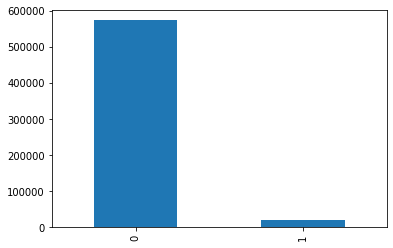

In [15]:
train.target.value_counts().plot(kind = 'bar')

参考答案：

数据的target类别极其不平衡，发起索赔的人太少了，这样会极大影响到我们的预测结果，很难通过大量的非索赔性特征去挖掘、令算法学习到出影响到发起索赔的特征。

补充：

如果你有余力，建议从下面链接中完成这100道Python Pandas puzzle！来为你下一阶段保驾护航！

链接：https://github.com/ajcr/100-pandas-puzzles/blob/master/100-pandas-puzzles.ipynb

[![H65i3d.gif](https://s4.ax1x.com/2022/02/14/H65i3d.gif)](https://imgtu.com/i/H65i3d)

<img src="https://s4.ax1x.com/2022/02/14/H65vxs.jpg" alt="image-20220214212808413" style="zoom:25%;" />